In [11]:
import numpy as np
from nldpy import DynamicalSystem, OneDimensionalDS
from nldpy import root_boundaries_1d, bisection_root, derivative_2
import matplotlib.pyplot as plt
import scienceplots

plt.style.use(['science', 'notebook'])

In [2]:
def pendulum(t, state_vector, params):
    gamma, omega0 = params
    x, v = state_vector

    dxdt = v
    dvdt = -omega0**2*x - 2*gamma*v

    return np.array([dxdt, dvdt])

def pendulum_theor(t, ic, params):
    gamma, omega0 = params
    x0, v0 = ic

    omega = np.sqrt(omega0**2 - gamma**2)
    A = np.sqrt(x0**2 + ((v0 + gamma*x0)/omega0)**2)
    phi0 = np.atan(x0*omega0/(v0 + gamma*x0))
    Omega = np.sqrt(omega**2 + gamma**2)
    psi = np.atan(omega/gamma)

    x = A*np.exp(-gamma*t)*np.sin(omega*t + phi0)
    v = -Omega*A*np.exp(-gamma*t)*np.sin(omega*t + phi0 - psi)

    return x, v

def autonom_1d(var, params):
    a, b = params
    x = var

    return a*np.sin(x + b)

In [3]:
p = [1, 1]
x0 = 0.1
t0 = 0

In [4]:
sys = OneDimensionalDS(autonom_1d, x0, p)
sys.dt = 1e-4

In [5]:
sys.integrate(2, 0)

In [6]:
sys.fixed_points(-5, 5)

[np.float64(-4.141592650037063),
 np.float64(-1.000000003137087),
 np.float64(2.141592659448322)]

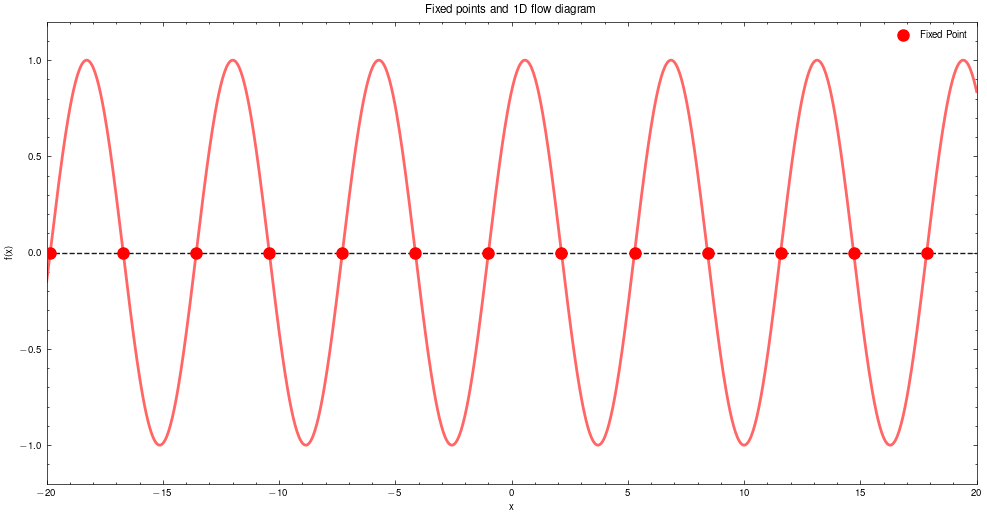

In [7]:
sys.plot_fixed_points(-20, 20)

In [8]:
def dv(var, params):
    a, b = params
    x = var

    return a*np.cos(x + b)

In [18]:
x_range = np.linspace(-20, 20, 1000)

f_dv = derivative_2(autonom_1d, 0, p, 1e-6, 0)

TypeError: 'int' object is not subscriptable

In [16]:
f_dv

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0.

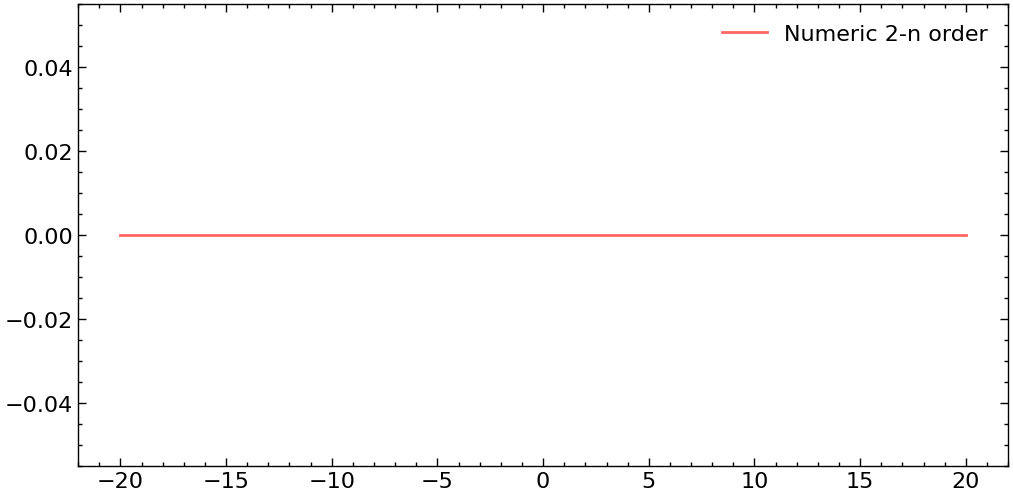

In [ ]:
plt.figure(figsize=(12, 6))

plt.plot(x_range, dv(x_range, p), c = '#344965', 
         lw=2, label='Analytic')

plt.plot(x_range, f_dv, c = '#FF6665',
         lw=2, label='Numeric 2-n order')

plt.legend()
plt.show()